In [101]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
from PIL import Image
from tqdm import tqdm

import os

In [102]:

parent_directory = 'C:/Users/Dell/Downloads/archive'

fyes = []
fno = []

# Iterate over "yes" and "no" folders
for folder_name in ['yes', 'no']:
    folder_path = os.path.join(parent_directory, folder_name)
    
    # Use os.walk to traverse the current folder and collect file paths
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            a = os.path.join(dirname, filename)
            if folder_name == 'yes':
                fyes.append(a)
            else:
                fno.append(a)

# Print the total number of files and the path of the second file in each list
print("Total number of 'yes' files:", len(fyes))
print("Path of the second 'yes' file:", fyes[1])

print("Total number of 'no' files:", len(fno))
print("Path of the second 'no' file:", fno[1])



Total number of 'yes' files: 155
Path of the second 'yes' file: C:/Users/Dell/Downloads/archive\yes\Y10.jpg
Total number of 'no' files: 98
Path of the second 'no' file: C:/Users/Dell/Downloads/archive\no\10 no.jpg


In [103]:
# File paths and labels for the "no" class
file_paths_no = fno
labels_no = ['no'] * len(file_paths_no)

# File paths and labels for the "yes" class
file_paths_yes = fyes
labels_yes = ['yes'] * len(file_paths_yes)


# Create DataFrames for the "no" and "yes" classes
df_no = pd.DataFrame({'filepath': file_paths_no, 'label': labels_no})
df_yes = pd.DataFrame({'filepath': file_paths_yes, 'label': labels_yes})

# Concatenate the DataFrames for both classes into a single DataFrame
df_combined = pd.concat([df_no, df_yes], ignore_index=True)
df_combined.head(25)


,filepath,label
0,C:/Users/Dell/Downloads/archive\no\1 no.jpeg,no
1,C:/Users/Dell/Downloads/archive\no\10 no.jpg,no
2,C:/Users/Dell/Downloads/archive\no\11 no.jpg,no
3,C:/Users/Dell/Downloads/archive\no\12 no.jpg,no
4,C:/Users/Dell/Downloads/archive\no\13 no.jpg,no
5,C:/Users/Dell/Downloads/archive\no\14 no.jpg,no
6,C:/Users/Dell/Downloads/archive\no\15 no.jpg,no
7,C:/Users/Dell/Downloads/archive\no\17 no.jpg,no
8,C:/Users/Dell/Downloads/archive\no\18 no.jpg,no
9,C:/Users/Dell/Downloads/archive\no\19 no.jpg,no


In [105]:
# Concatenate the DataFrames for both classes into a single DataFrame
df_combined = pd.concat([df_no, df_yes], ignore_index=True)

# Initialize an empty list to store image arrays
image_arrays = []

# Load and resize images for the "no" class
for file_path in fno:
    image = Image.open(file_path)
    image = image.resize((224, 224))
    image_array = np.asarray(image)
    image_arrays.append(image_array)

# Load and resize images for the "yes" class
for file_path in fyes:
    image = Image.open(file_path)
    image = image.resize((224, 224))
    image_array = np.asarray(image)
    image_arrays.append(image_array)

# Create a new column "Imagearr" in the DataFrame and assign the image arrays
df_combined["Imagearr"] = image_arrays


In [106]:
import cv2
o = df_combined.Imagearr[5]
og = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
Image.fromarray(og)
print(og.shape)

(224, 224)


In [107]:
Image.fromarray(o)
print(o.shape)

(224, 224, 3)


In [108]:

df_combined["GLCM-Contrast-1"] = ''
df_combined["GLCM-Contrast-2"] = ''
df_combined["GLCM-Contrast-3"] = ''
df_combined["GLCM-Contrast-4"] = ''

df_combined["GLCM-Dissimilarity-1"] =''
df_combined["GLCM-Dissimilarity-2"] =''
df_combined["GLCM-Dissimilarity-3"] =''
df_combined["GLCM-Dissimilarity-4"] =''
    
df_combined["GLCM-Homogeneity-1"]=''
df_combined["GLCM-Homogeneity-2"]=''
df_combined["GLCM-Homogeneity-3"]=''
df_combined["GLCM-Homogeneity-4"]=''
    
df_combined["GLCM-Energy-1"]=''
df_combined["GLCM-Energy-2"]=''
df_combined["GLCM-Energy-3"]=''
df_combined["GLCM-Energy-4"]=''

df_combined["GLCM-Correlation-1"] =''
df_combined["GLCM-Correlation-2"] =''
df_combined["GLCM-Correlation-3"] =''
df_combined["GLCM-Correlation-4"] =''

df_combined["GLCM-ASM-1"]=''
df_combined["GLCM-ASM-2"]=''
df_combined["GLCM-ASM-3"]=''
df_combined["GLCM-ASM-4"]=''


In [109]:
df_combined.head()


,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-3,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4
0,C:/Users/Dell/Downloads/archive\no\1 no.jpeg,no,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",,,,,,,,...,,,,,,,,,,
1,C:/Users/Dell/Downloads/archive\no\10 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
2,C:/Users/Dell/Downloads/archive\no\11 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
3,C:/Users/Dell/Downloads/archive\no\12 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,
4,C:/Users/Dell/Downloads/archive\no\13 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",,,,,,,,...,,,,,,,,,,


In [110]:
def fxnglcm(img,i):
    from skimage.feature import graycomatrix,graycoprops
    import skimage.feature as feature


    graycom = feature.graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)


    c = feature.graycoprops(graycom, 'contrast')
    d = feature.graycoprops(graycom, 'dissimilarity')
    h = feature.graycoprops(graycom, 'homogeneity')
    e = feature.graycoprops(graycom, 'energy')
    corr = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')
    c = np.squeeze(c)
    d = np.squeeze(d)
    h = np.squeeze(h)
    e = np.squeeze(e)
    corr = np.squeeze(corr)
    asm = np.squeeze(ASM)
    
    df["GLCM-Contrast-1"][i] = c[0]
    df["GLCM-Contrast-2"][i] = c[1]
    df["GLCM-Contrast-3"][i] = c[2]
    df["GLCM-Contrast-4"][i] = c[3]

    df["GLCM-Dissimilarity-1"][i] =d[0]
    df["GLCM-Dissimilarity-2"][i] =d[1]
    df["GLCM-Dissimilarity-3"][i] =d[2]
    df["GLCM-Dissimilarity-4"][i] =d[3]
    
    df["GLCM-Homogeneity-1"][i] =h[0]
    df["GLCM-Homogeneity-2"][i]=h[1]
    df["GLCM-Homogeneity-3"][i] =h[2]
    df["GLCM-Homogeneity-4"][i] =h[3]
    
    df["GLCM-Energy-1"][i] =e[0]
    df["GLCM-Energy-2"][i] =e[1]
    df["GLCM-Energy-3"][i] =e[2]
    df["GLCM-Energy-4"][i] =e[3]

    df["GLCM-Correlation-1"][i] =corr[0]
    df["GLCM-Correlation-2"][i] =corr[1]
    df["GLCM-Correlation-3"][i] =corr[2]
    df["GLCM-Correlation-4"][i] =corr[3]

    df["GLCM-ASM-1"][i] =asm[0]
    df["GLCM-ASM-2"][i] =asm[1]
    df["GLCM-ASM-3"][i] =asm[2]
    df["GLCM-ASM-4"][i] =asm[3]
    
    
    
    return df

In [111]:
def fxnglcm(img, i, df):
    from skimage.feature import graycomatrix, graycoprops
    import skimage.feature as feature

    graycom = feature.graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    c = feature.graycoprops(graycom, 'contrast')
    d = feature.graycoprops(graycom, 'dissimilarity')
    h = feature.graycoprops(graycom, 'homogeneity')
    e = feature.graycoprops(graycom, 'energy')
    corr = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')
    c = np.squeeze(c)
    d = np.squeeze(d)
    h = np.squeeze(h)
    e = np.squeeze(e)
    corr = np.squeeze(corr)
    asm = np.squeeze(ASM)

    df["GLCM-Contrast-1"][i] = c[0]
    df["GLCM-Contrast-2"][i] = c[1]
    df["GLCM-Contrast-3"][i] = c[2]
    df["GLCM-Contrast-4"][i] = c[3]

    df["GLCM-Dissimilarity-1"][i] = d[0]
    df["GLCM-Dissimilarity-2"][i] = d[1]
    df["GLCM-Dissimilarity-3"][i] = d[2]
    df["GLCM-Dissimilarity-4"][i] = d[3]

    df["GLCM-Homogeneity-1"][i] = h[0]
    df["GLCM-Homogeneity-2"][i] = h[1]
    df["GLCM-Homogeneity-3"][i] = h[2]
    df["GLCM-Homogeneity-4"][i] = h[3]

    df["GLCM-Energy-1"][i] = e[0]
    df["GLCM-Energy-2"][i] = e[1]
    df["GLCM-Energy-3"][i] = e[2]
    df["GLCM-Energy-4"][i] = e[3]

    df["GLCM-Correlation-1"][i] = corr[0]
    df["GLCM-Correlation-2"][i] = corr[1]
    df["GLCM-Correlation-3"][i] = corr[2]
    df["GLCM-Correlation-4"][i] = corr[3]

    df["GLCM-ASM-1"][i] = asm[0]
    df["GLCM-ASM-2"][i] = asm[1]
    df["GLCM-ASM-3"][i] = asm[2]
    df["GLCM-ASM-4"][i] = asm[3]

def glcmfiller(imgarr, i, df):
    import cv2
    if imgarr.shape != (224, 224):
        og = cv2.cvtColor(imgarr, cv2.COLOR_BGR2GRAY)
        updated_img = fxnglcm(og, i, df)  # Assuming fxnglcm returns the updated image
    else:
        updated_img = fxnglcm(imgarr, i, df)  # Assuming fxnglcm returns the updated image

    return updated_img

# Usage in your loop
for i in tqdm(range(253)):
    imgarr = df_combined.loc[i, "Imagearr"].copy()  # Create a writable copy of the image
    updated_image = glcmfiller(imgarr, i, df_combined)
    df_combined.loc[i, "gry"] = updated_image



  0%|          | 0/253 [00:00<?, ?it/s]

100%|██████████| 253/253 [00:11<00:00, 21.47it/s]


In [87]:
df_combined.head()

,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4,gry
0,C:/Users/Dell/Downloads/archive\no\1 no.jpeg,no,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",174.669283,276.241429,143.449632,278.214281,5.420764,7.046593,5.147782,...,0.232088,0.932715,0.893736,0.944741,0.892977,0.057342,0.053982,0.057147,0.053865,NaN
1,C:/Users/Dell/Downloads/archive\no\10 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",62.477018,112.266545,58.197249,111.948219,4.485426,6.284965,4.431394,...,0.224448,0.980677,0.965223,0.982002,0.965322,0.054741,0.050548,0.054716,0.050377,NaN
2,C:/Users/Dell/Downloads/archive\no\11 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",314.221933,387.425144,92.815363,372.898047,5.248318,5.951557,2.773042,...,0.666493,0.890127,0.864994,0.967546,0.870056,0.449328,0.444185,0.453695,0.444213,NaN
3,C:/Users/Dell/Downloads/archive\no\12 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",224.858824,301.356975,94.841428,284.513282,5.403467,6.319512,3.463945,...,0.547761,0.959329,0.945598,0.982846,0.948639,0.304778,0.299518,0.307865,0.300042,NaN
4,C:/Users/Dell/Downloads/archive\no\13 no.jpg,no,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",372.088045,451.53876,102.220592,442.331738,7.17741,7.906111,3.585822,...,0.417846,0.920224,0.903256,0.978043,0.905228,0.175731,0.174691,0.189371,0.174595,NaN


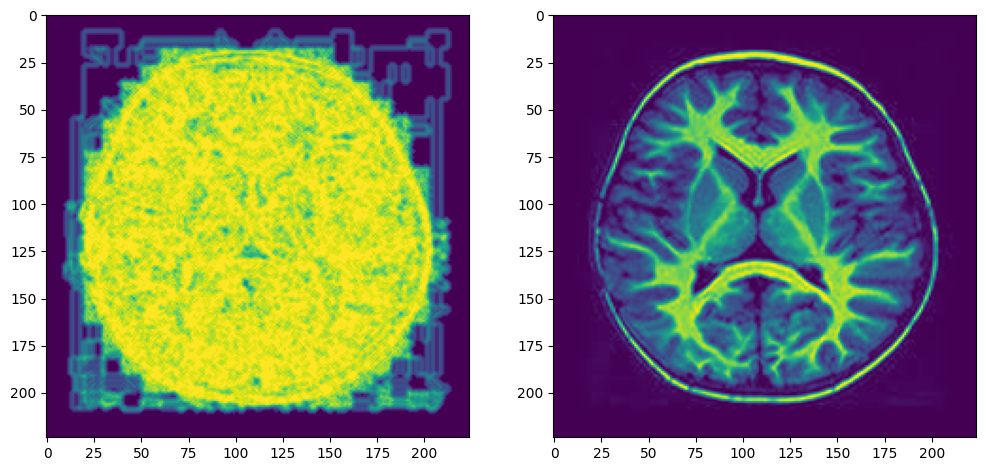

In [112]:
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(og,disk(2))

fig = plt.figure(figsize = (12,12)) 
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(entropy_img)
ax2.imshow(og)
plt.show()

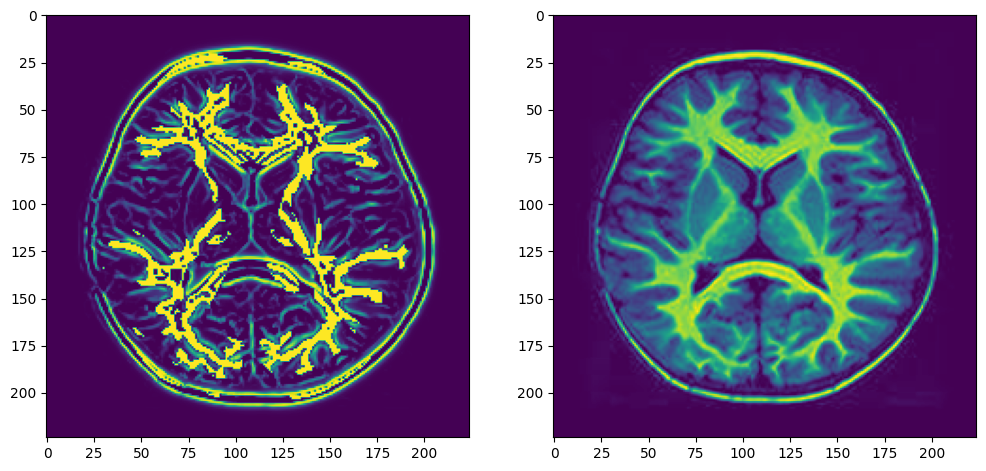

In [113]:
from skimage.filters import hessian

hessian_img = hessian(og,sigmas = range(1,100,1))
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(hessian_img)
ax2.imshow(og)

plt.show()

In [71]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [117]:
df_combined.head()


,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4,gry
242,C:/Users/Dell/Downloads/archive\yes\Y89.JPG,1,"[[[253, 253, 253], [255, 255, 255], [254, 254,...",371.28087,838.008546,476.614009,835.532446,6.85458,11.168433,7.070247,...,0.042357,0.947665,0.877544,0.93282,0.877905,0.002891,0.001779,0.002619,0.001794,NaN
200,C:/Users/Dell/Downloads/archive\yes\Y39.jpg,1,"[[3, 2, 2, 3, 4, 4, 1, 1, 4, 4, 4, 3, 3, 3, 3,...",246.539878,432.75823,275.463985,496.198415,9.378764,11.701261,9.005786,...,0.032365,0.960212,0.930001,0.955539,0.919739,0.001398,0.001078,0.001362,0.001048,NaN
29,C:/Users/Dell/Downloads/archive\no\37 no.jpg,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",479.136371,839.777916,521.695027,834.57564,8.615231,11.467594,8.537076,...,0.567953,0.932664,0.882311,0.926683,0.88304,0.328723,0.322296,0.329282,0.322571,NaN
63,C:/Users/Dell/Downloads/archive\no\no 1.jpg,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",175.456518,283.181966,144.580958,283.802972,5.400625,7.135997,5.077434,...,0.225123,0.932586,0.891347,0.944449,0.891109,0.0562,0.050747,0.057221,0.05068,NaN
167,C:/Users/Dell/Downloads/archive\yes\Y242.JPG,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",166.985206,256.637133,128.925629,298.428261,7.243173,9.001468,6.101117,...,0.036407,0.942769,0.911761,0.955828,0.89739,0.001729,0.001341,0.001721,0.001325,NaN


In [122]:
df_combined.head()

,filepath,label,Imagearr,GLCM-Contrast-1,GLCM-Contrast-2,GLCM-Contrast-3,GLCM-Contrast-4,GLCM-Dissimilarity-1,GLCM-Dissimilarity-2,GLCM-Dissimilarity-3,...,GLCM-Energy-4,GLCM-Correlation-1,GLCM-Correlation-2,GLCM-Correlation-3,GLCM-Correlation-4,GLCM-ASM-1,GLCM-ASM-2,GLCM-ASM-3,GLCM-ASM-4,gry
189,C:/Users/Dell/Downloads/archive\yes\Y29.jpg,1,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",328.964966,583.183937,309.445508,554.498703,5.956879,8.117798,5.767096,...,0.60158,0.950674,0.912788,0.953601,0.917078,0.36615,0.362161,0.366414,0.361898,NaN
20,C:/Users/Dell/Downloads/archive\no\29 no.jpg,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",420.946889,709.583523,388.449952,759.382473,8.608524,11.561604,8.014454,...,0.151431,0.924873,0.873316,0.93062,0.864425,0.029058,0.022928,0.027851,0.022931,NaN
39,C:/Users/Dell/Downloads/archive\no\46 no.jpg,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",192.726337,330.392326,188.790038,358.244244,6.055293,8.301152,6.345372,...,0.490966,0.978544,0.963266,0.978982,0.960169,0.247756,0.241406,0.246615,0.241048,NaN
203,C:/Users/Dell/Downloads/archive\yes\Y41.jpg,1,"[[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 3,...",396.38505,740.133242,413.582679,697.17901,9.873799,13.515936,10.011411,...,0.062876,0.958201,0.92188,0.956385,0.926414,0.005109,0.003983,0.004692,0.003953,NaN
222,C:/Users/Dell/Downloads/archive\yes\Y62.jpg,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",222.93766,383.934927,191.392096,376.051881,6.057816,8.347684,6.224816,...,0.221527,0.934391,0.886862,0.943675,0.889185,0.052695,0.049137,0.052603,0.049074,NaN


In [141]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(file_path, target_size=(224, 224)):
    image = load_img(file_path, target_size=target_size)
    image = img_to_array(image)
    image = preprocess_input(image)
    return image

# Load and preprocess image data for training and testing
X_train_images = np.array([load_and_preprocess_image(file) for file in train_df['filepath']])
X_test_images = np.array([load_and_preprocess_image(file) for file in test_df['filepath']])


In [143]:
# Define the names of the columns containing GLCM features
glcm_feature_columns = [
    'GLCM-Contrast-1', 'GLCM-Contrast-2', 'GLCM-Contrast-3', 'GLCM-Contrast-4',
    'GLCM-Dissimilarity-1', 'GLCM-Dissimilarity-2', 'GLCM-Dissimilarity-3',
    # Add more GLCM feature column names as needed
]

# Now, you can use these column names to extract the GLCM features from your DataFrame
X_train_glcm = np.array(train_df[glcm_feature_columns])
X_test_glcm = np.array(test_df[glcm_feature_columns])



In [145]:

# Convert GLCM feature data to float32
X_train_glcm = X_train_glcm.astype(np.float32)
X_test_glcm = X_test_glcm.astype(np.float32)

# Handle NaN values (e.g., fill with 0)
X_train_glcm = np.nan_to_num(X_train_glcm, nan=0)
X_test_glcm = np.nan_to_num(X_test_glcm, nan=0)


In [153]:
# Correct way to access the shape of NumPy arrays or tensors
image_shape = X_train_images.shape
glcm_shape = X_train_glcm.shape

# Printing the shapes
print("Image Data Shape:", image_shape)
print("GLCM Data Shape:", glcm_shape)


Image Data Shape: (202, 224, 224, 3)
GLCM Data Shape: (202, 7)


In [156]:
import numpy as np

# Assuming glcm_data is your original GLCM data with shape (202, 7)
glcm_data = np.array( X_train_glcm)  # Convert to a NumPy array if not already

# Reshape your GLCM data to match the expected shape (assuming you want to duplicate the 7 features)
desired_shape = (glcm_data.shape[0], 24)  # 24 is the desired number of features
glcm_data_reshaped = np.tile(glcm_data, (1, 4))  # Duplicate the 7 features 4 times to get 28 features

# Now glcm_data_reshaped should have a shape of (202, 28), which matches the expected input shape


In [159]:
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

# Image input
image_input = Input(shape=(224, 224, 3))
conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
# Add more convolutional and pooling layers as needed

# GLCM input
glcm_input = Input(shape=(7,))

# Merge both branches
merged = Flatten()(conv1)
merged = Dense(64, activation='relu')(merged)
merged = Dense(32, activation='relu')(merged)
merged = Dense(24, activation='relu')(merged)  # Adjust the output shape to match (None, 24)

# Output layer
output = Dense(1, activation='sigmoid')(merged)

# Create the model
model = Model(inputs=[image_input, glcm_input], outputs=output)



In [161]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare the data
# Assuming you have X_train_images, X_test_images, X_train_glcm, X_test_glcm, y_train, and y_test defined earlier

# Train the model
history = model.fit([X_train_images, X_train_glcm], y_train, epochs=20, batch_size=64, validation_data=([X_test_images, X_test_glcm], y_test))

# Evaluate the model
accuracy = model.evaluate([X_test_images, X_test_glcm], y_test)

print("Test Accuracy:", accuracy[1])


Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 326.6194 - accuracy: 0.5792 - val_loss: 531.6727 - val_accuracy: 0.5882
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 344.8958 - accuracy: 0.6188 - val_loss: 230.4601 - val_accuracy: 0.5686
Epoch 3/20
4/4 [==============================] - 12s 3s/step - loss: 45.9595 - accuracy: 0.7178 - val_loss: 210.9284 - val_accuracy: 0.3529
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 22.8519 - accuracy: 0.7970 - val_loss: 174.4370 - val_accuracy: 0.5098
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 31.5920 - accuracy: 0.8267 - val_loss: 160.0939 - val_accuracy: 0.4706
Epoch 6/20
4/4 [==============================] - 7s 2s/step - loss: 10.4510 - accuracy: 0.9010 - val_loss: 126.9057 - val_accuracy: 0.5098
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 7.9740 - accuracy: 0.9257 - val_loss: 125.6203 - val_accuracy: 0.4706
Epoch 8/20
4/4 [=

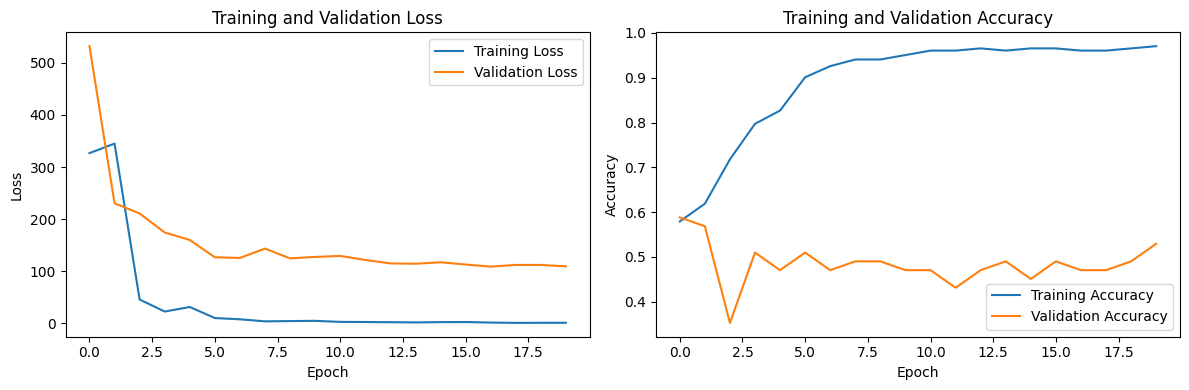

In [162]:
import matplotlib.pyplot as plt

# Access training history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 122ms/step


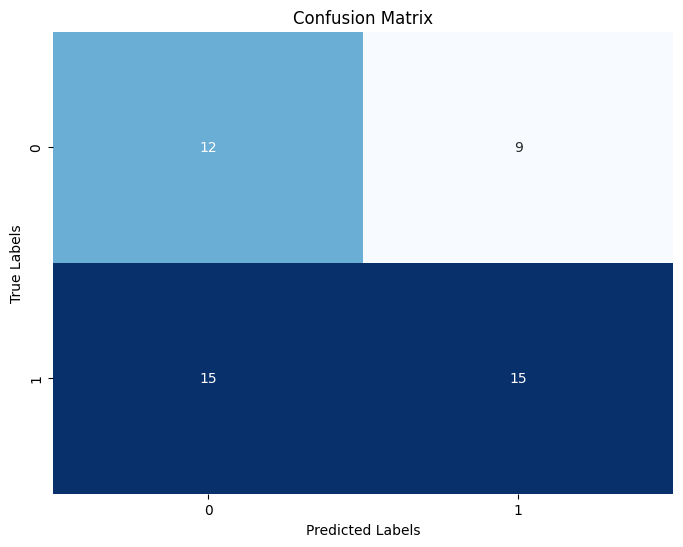

Confusion Matrix:
[[12  9]
 [15 15]]

Accuracy: 0.5294117647058824

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.57      0.50        21
           1       0.62      0.50      0.56        30

    accuracy                           0.53        51
   macro avg       0.53      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict([X_test_images, X_test_glcm])
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)



# Generate a classification report
classification_rep = classification_report(y_test, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_rep)
